# <center><div style="font-family: Trebuchet MS; background-color: #AED6F2; color: #3498DB; padding: 12px; line-height: 1;">Telco Customer Churn Data Analysis</div></center>
## <div style="color: #3415DB"><center> Customer Lifetime Value </center>
#### <center> Kwok Sze Ming [22022177D]</center>
- https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics


<center>
    <img src="https://storage.googleapis.com/profit-prod/wp-content/uploads/2022/03/69f67b84-clv-bg.png" alt="Telco" width="50%">
</center>


In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/user/Desktop/0capstone/telecom_customer_churn.csv/telecom_customer_churn.csv")
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [4]:
# Define a dictionary to map values
mapping = {'Churned': 1, 'Stayed': 0, 'Joined':0, 'Yes':1, 'No':0, 'NaN':0}

# Apply mapping to all columns
data = data.replace(mapping)

In [5]:
bins = [1, 10, 19, 28, 37, 46, 55, 64, 73]
labels = ['1-to-9', '10-to-18', '19-to-27', '28-to-36', '37-to-45', '46-to-54', '55-to-63', '64-to-72']

data['Tenure Group'] = pd.cut(data['Tenure in Months'], bins=bins, labels=labels)

grouped_data_frames = {}

for label in labels:
    grouped_data_frames[label] = data[data['Tenure Group'] == label].copy()

for label, df in grouped_data_frames.items():
    print(f"Data Frame for Tenure Group: {label}")
    print(df.head())

Data Frame for Tenure Group: 1-to-9
  Customer ID  Gender  Age  Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37        1                     0  Frazier Park   
1  0003-MKNFE    Male   46        0                     0      Glendale   
2  0004-TLHLJ    Male   50        0                     0    Costa Mesa   
4  0013-EXCHZ  Female   75        1                     0     Camarillo   
5  0013-MHZWF  Female   23        0                     3      Midpines   

   Zip Code   Latitude   Longitude  Number of Referrals  ...  Monthly Charge  \
0     93225  34.827662 -118.999073                    2  ...            65.6   
1     91206  34.162515 -118.203869                    0  ...            -4.0   
2     92627  33.645672 -117.922613                    0  ...            73.9   
4     93010  34.227846 -119.079903                    3  ...            83.9   
5     95345  37.581496 -119.972762                    0  ...            69.4   

  Total Charges  Total Refunds  

In [6]:
bins = [1, 10, 19, 28, 37, 46, 55, 64, 73]
labels = ['1-to-9', '10-to-18', '19-to-27', '28-to-36', '37-to-45', '46-to-54', '55-to-63', '64-to-72']

# Create a new column 'Tenure Group' based on the bins
data['Tenure Group'] = pd.cut(data['Tenure in Months'], bins=bins, labels=labels)

revenue_columns = ['Total Revenue']
order_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
                  'Online Backup', 'Device Protection Plan', 'Streaming Music', 'Unlimited Data']
length_columns = ['Tenure in Months']
retention_column = ['Customer Status']

metrics_df = pd.DataFrame(index=labels, columns=['Total Revenue', 'Number of Orders', 'Average Length of Purchase Cycle', 
                                                'Customer Retention Rate', 'Average Order Value', 'Purchase Frequency', 
                                                'Churn Rate', 'CLV','Total Data'])

# Calculate metrics for each group
for label in labels:
    group_df = data[data['Tenure Group'] == label]
    
    # Total Revenue
    total_revenue = group_df['Total Revenue'].sum()
    
    # Number of Orders
    num_orders = group_df[order_columns].sum().sum()  # Sum all orders across columns
    
    # Average Length of Purchase Cycle
    avg_length_purchase_cycle = group_df['Tenure in Months'].mean()
    
    # Customer Retention Rate
    retention_rate = group_df['Customer Status'].mean()
    
    # Average Order Value
    avg_order_value = total_revenue / num_orders if num_orders > 0 else 0
    
    # Purchase Frequency
    purchase_frequency = 1 / avg_length_purchase_cycle if avg_length_purchase_cycle > 0 else 0
    
    # Churn Rate
    churn_rate = 1 / retention_rate if retention_rate > 0 else 0
    
    # CLV (Customer Lifetime Value)
    clv = (avg_order_value * purchase_frequency) / churn_rate if churn_rate > 0 else 0
    
    # Total Data
    total_data = group_df.shape[0]  
    
    metrics_df.loc[label] = [total_revenue, num_orders, avg_length_purchase_cycle, retention_rate, 
                             avg_order_value, purchase_frequency, churn_rate, clv, total_data]

metrics_df

,Total Revenue,Number of Orders,Average Length of Purchase Cycle,Customer Retention Rate,Average Order Value,Purchase Frequency,Churn Rate,CLV,Total Data
1-to-9,600953.04,4587.0,5.414149,0.433309,131.012217,0.184701,2.307823,10.485257,1357
10-to-18,1028590.41,3023.0,14.756272,0.316607,340.254849,0.067768,3.158491,7.300424,837
19-to-27,1413670.56,2648.0,23.917391,0.233333,533.863505,0.041811,4.285714,5.208267,690
28-to-36,1797776.86,2540.0,32.914754,0.216393,707.786165,0.030382,4.621212,4.653241,610
37-to-45,2117704.72,2446.0,42.077876,0.189381,865.782796,0.023765,5.280374,3.896642,565
46-to-54,2916529.39,2820.0,51.025974,0.162338,1034.23028,0.019598,6.16,3.290374,616
55-to-63,3760974.45,3160.0,60.066563,0.099071,1190.181788,0.016648,10.09375,1.963035,646
64-to-72,7688733.32,6032.0,69.611362,0.064923,1274.657381,0.014365,15.402778,1.188815,1109


In [7]:
bins = [1, 10, 19, 28, 37, 46, 55, 64, 73]
labels = ['1-to-9', '10-to-18', '19-to-27', '28-to-36', '37-to-45', '46-to-54', '55-to-63', '64-to-72']

# Create a new column 'Tenure Group' based on the bins
data['Tenure Group'] = pd.cut(data['Tenure in Months'], bins=bins, labels=labels)

order_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
                  'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 
                 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']
length_columns = ['Tenure in Months']
retention_column = ['Customer Status']

metrics_df = pd.DataFrame(columns=['Customer ID','Total Revenue', 'Number of Orders', 'Average Length of Purchase Cycle', 
                                    'Customer Retention Rate', 'Average Order Value', 'Purchase Frequency', 
                                    'Churn Rate', 'CLV', 'Tenure Group', 'Total Data'])

# Calculate metrics for each row (customer)
for index, row in data.iterrows():
    Customer_ID = row['Customer ID']
    
    # Total Revenue
    total_revenue = row['Total Revenue']
    
    # Number of Orders
    num_orders = sum(row[order_columns])
    
    # Average Length of Purchase Cycle
    avg_length_purchase_cycle = row['Tenure in Months']
    
    # Customer Retention Rate
    retention_rate = row['Customer Status']
    
    # Average Order Value
    avg_order_value = total_revenue / num_orders if num_orders > 0 else 0
    
    # Purchase Frequency
    purchase_frequency = 1 / avg_length_purchase_cycle if avg_length_purchase_cycle > 0 else 0
    
    # Churn Rate
    churn_rate = 1 / retention_rate if retention_rate > 0 else 0
    
    # CLV (Customer Lifetime Value)
    clv = (avg_order_value * purchase_frequency) / churn_rate if churn_rate > 0 else 0
    
    metrics_df = metrics_df.append({'Customer ID': row['Customer ID'],
                                    'Total Revenue': total_revenue, 
                                    'Number of Orders': num_orders, 
                                    'Average Length of Purchase Cycle': avg_length_purchase_cycle, 
                                    'Customer Retention Rate': retention_rate, 
                                    'Average Order Value': avg_order_value, 
                                    'Purchase Frequency': purchase_frequency, 
                                    'Churn Rate': churn_rate, 
                                    'CLV': clv, 
                                    'Tenure Group': row['Tenure Group'],
                                    'Total Data': 1}, 
                                    ignore_index=True)

metrics_df

,Customer ID,Total Revenue,Number of Orders,Average Length of Purchase Cycle,Customer Retention Rate,Average Order Value,Purchase Frequency,Churn Rate,CLV,Tenure Group,Total Data
0,0002-ORFBO,974.81,6.0,9,0,162.468333,0.111111,0,0,1-to-9,1
1,0003-MKNFE,610.28,5.0,9,0,122.056,0.111111,0,0,1-to-9,1
2,0004-TLHLJ,415.45,4.0,4,1,103.8625,0.25,1.0,25.965625,1-to-9,1
3,0011-IGKFF,1599.51,7.0,13,1,228.501429,0.076923,1.0,17.577033,10-to-18,1
4,0013-EXCHZ,289.54,5.0,3,1,57.908,0.333333,1.0,19.302667,1-to-9,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,1349.74,6.0,13,0,224.956667,0.076923,0,0,10-to-18,1
7039,9992-RRAMN,2230.1,6.0,22,1,371.683333,0.045455,1.0,16.894697,19-to-27,1
7040,9992-UJOEL,129.99,4.0,2,0,32.4975,0.5,0,0,1-to-9,1
7041,9993-LHIEB,4769.69,8.0,67,0,596.21125,0.014925,0,0,64-to-72,1


In [8]:
data = pd.merge(data, metrics_df[['Customer ID', 'CLV']], on='Customer ID', how='left')
data.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason,Tenure Group,CLV
0,0002-ORFBO,Female,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,593.30,0.00,0,381.51,974.81,0,NaN,NaN,1-to-9,0
1,0003-MKNFE,Male,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,542.40,38.33,10,96.21,610.28,0,NaN,NaN,1-to-9,0
2,0004-TLHLJ,Male,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,280.85,0.00,0,134.60,415.45,1,Competitor,Competitor had better devices,1-to-9,25.965625
3,0011-IGKFF,Male,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,1237.85,0.00,0,361.66,1599.51,1,Dissatisfaction,Product dissatisfaction,10-to-18,17.577033
4,0013-EXCHZ,Female,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,267.40,0.00,0,22.14,289.54,1,Dissatisfaction,Network reliability,1-to-9,19.302667


In [9]:
# Replace NaN values with 0
metrics_df.fillna(0, inplace=True)

# Replace NaN values with infinity
metrics_df.fillna(float('inf'), inplace=True)

# Replace NaN values with a value too large for dtype to 4 decimal places
large_value = 10**6  
metrics_df.fillna(large_value, inplace=True)

# Round all values to 4 decimal places
metrics_df = metrics_df.round(4)

X_df=metrics_df

In [10]:
X_df=X_df.drop(columns=['CLV', 'Customer ID', 'Tenure Group', 'Total Data'])

In [11]:
X_df

,Total Revenue,Number of Orders,Average Length of Purchase Cycle,Customer Retention Rate,Average Order Value,Purchase Frequency,Churn Rate
0,974.81,6.0,9,0,162.4683,0.1111,0.0
1,610.28,5.0,9,0,122.0560,0.1111,0.0
2,415.45,4.0,4,1,103.8625,0.2500,1.0
3,1599.51,7.0,13,1,228.5014,0.0769,1.0
4,289.54,5.0,3,1,57.9080,0.3333,1.0
...,...,...,...,...,...,...,...
7038,1349.74,6.0,13,0,224.9567,0.0769,0.0
7039,2230.10,6.0,22,1,371.6833,0.0455,1.0
7040,129.99,4.0,2,0,32.4975,0.5000,0.0
7041,4769.69,8.0,67,0,596.2112,0.0149,0.0


In [12]:
metrics_df

,Customer ID,Total Revenue,Number of Orders,Average Length of Purchase Cycle,Customer Retention Rate,Average Order Value,Purchase Frequency,Churn Rate,CLV,Tenure Group,Total Data
0,0002-ORFBO,974.81,6.0,9,0,162.4683,0.1111,0.0,0.0000,1-to-9,1
1,0003-MKNFE,610.28,5.0,9,0,122.0560,0.1111,0.0,0.0000,1-to-9,1
2,0004-TLHLJ,415.45,4.0,4,1,103.8625,0.2500,1.0,25.9656,1-to-9,1
3,0011-IGKFF,1599.51,7.0,13,1,228.5014,0.0769,1.0,17.5770,10-to-18,1
4,0013-EXCHZ,289.54,5.0,3,1,57.9080,0.3333,1.0,19.3027,1-to-9,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,1349.74,6.0,13,0,224.9567,0.0769,0.0,0.0000,10-to-18,1
7039,9992-RRAMN,2230.10,6.0,22,1,371.6833,0.0455,1.0,16.8947,19-to-27,1
7040,9992-UJOEL,129.99,4.0,2,0,32.4975,0.5000,0.0,0.0000,1-to-9,1
7041,9993-LHIEB,4769.69,8.0,67,0,596.2112,0.0149,0.0,0.0000,64-to-72,1


In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

X = X_df  
y = metrics_df['CLV']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# linear regression model
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
r_squared_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression - Mean Squared Error:", mse_linear)
print("Linear Regression - Root Mean Squared Error:", rmse_linear)
print("Linear Regression - R-squared:", r_squared_linear)

# decision tree regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = mse_decision_tree ** 0.5
r_squared_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("\nDecision Tree - Mean Squared Error:", mse_decision_tree)
print("Decision Tree - Root Mean Squared Error:", rmse_decision_tree)
print("Decision Tree - R-squared:", r_squared_decision_tree)

# random forest regressor model
random_forest_model = RandomForestRegressor(random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred_random_forest = random_forest_model.predict(X_test)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = mse_random_forest ** 0.5
r_squared_random_forest = r2_score(y_test, y_pred_random_forest)

print("\nRandom Forest - Mean Squared Error:", mse_random_forest)
print("Random Forest - Root Mean Squared Error:", rmse_random_forest)
print("Random Forest - R-squared:", r_squared_random_forest)

Linear Regression - Mean Squared Error: 26.16292846931916
Linear Regression - Root Mean Squared Error: 5.114971013536554
Linear Regression - R-squared: 0.7081695970398555

Decision Tree - Mean Squared Error: 1.321306738708304
Decision Tree - Root Mean Squared Error: 1.1494810736625045
Decision Tree - R-squared: 0.9852616851189505

Random Forest - Mean Squared Error: 1.120309355365146
Random Forest - Root Mean Squared Error: 1.0584466710066909
Random Forest - R-squared: 0.9875036798346322


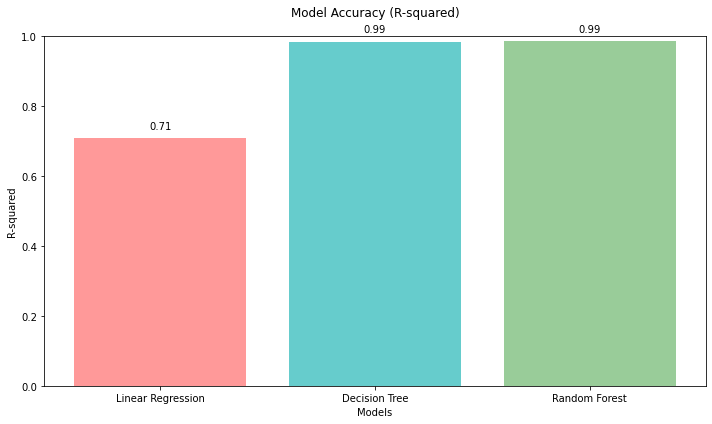

In [14]:
import matplotlib.pyplot as plt

r_squared_values = [r_squared_linear, r_squared_decision_tree, r_squared_random_forest]

models = ['Linear Regression', 'Decision Tree', 'Random Forest']

pastel_colors = ['#FF9999', '#66CCCC', '#99CC99']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, r_squared_values, color=pastel_colors)

plt.title('Model Accuracy (R-squared)', pad=20)  
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(0, 1)  

for bar, accuracy in zip(bars, r_squared_values):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 0.02, 
             f'{accuracy:.2f}', 
             ha='center', va='bottom')

plt.tight_layout() 
plt.show()

In [24]:
celldata = pd.read_csv("C:/Users/user/Desktop/0capstone/cell2cell_duke/cell2cell_duke.csv")
celldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 71047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             70831 non-null  float64
 3   MonthlyMinutes             70831 non-null  float64
 4   TotalRecurringCharge       70831 non-null  float64
 5   DirectorAssistedCalls      70831 non-null  float64
 6   OverageMinutes             70831 non-null  float64
 7   RoamingCalls               70831 non-null  float64
 8   PercChangeMinutes          70545 non-null  float64
 9   PercChangeRevenues         70545 non-null  float64
 10  DroppedCalls               71047 non-null  float64
 11  BlockedCalls               71047 non-null  float64
 12  UnansweredCalls            71047 non-null  float64
 13  CustomerCareCalls          71047 non-null  flo

In [25]:
celldata.dropna(axis=0, inplace=True)

[]


In [26]:
mapping = {'Yes': 1, 'No': 0}
celldata = celldata.replace(mapping)

In [29]:
celldata = celldata[celldata['TotalRecurringCharge'] != 0]

celldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49634 entries, 0 to 51043
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49634 non-null  int64  
 1   Churn                      49634 non-null  int64  
 2   MonthlyRevenue             49634 non-null  float64
 3   MonthlyMinutes             49634 non-null  float64
 4   TotalRecurringCharge       49634 non-null  float64
 5   DirectorAssistedCalls      49634 non-null  float64
 6   OverageMinutes             49634 non-null  float64
 7   RoamingCalls               49634 non-null  float64
 8   PercChangeMinutes          49634 non-null  float64
 9   PercChangeRevenues         49634 non-null  float64
 10  DroppedCalls               49634 non-null  float64
 11  BlockedCalls               49634 non-null  float64
 12  UnansweredCalls            49634 non-null  float64
 13  CustomerCareCalls          49634 non-null  flo

In [33]:
revenue_columns = ['TotalRecurringCharge']
order_columns = ['HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 'RoamingCalls', 
                 'OverageMinutes', 'ActiveSubs', 'UniqueSubs']
length_columns = ['MonthsInService']
retention_column = ['Churn']

celldata_df = pd.DataFrame(columns=['Customer ID','Total Revenue', 'Number of Orders', 'Average Length of Purchase Cycle', 
                                    'Customer Retention Rate', 'Average Order Value', 'Purchase Frequency', 
                                    'Churn Rate'])

for index, row in celldata.iterrows():
    Customer_ID = row['CustomerID']
    
    # Total Revenue
    total_revenue = row['TotalRecurringCharge']
    
    # Number of Orders
    num_orders = sum(row[order_columns])
    
    # Average Length of Purchase Cycle
    avg_length_purchase_cycle = row['MonthsInService']
    
    # Customer Retention Rate
    retention_rate = row['Churn']  
    
    # Average Order Value
    avg_order_value = total_revenue / num_orders if num_orders > 0 else 0
    
    # Purchase Frequency
    purchase_frequency = 1 / avg_length_purchase_cycle if avg_length_purchase_cycle > 0 else 0
    
    # Churn Rate
    churn_rate = 1 / retention_rate if retention_rate > 0 else 0
    
    celldata_df = celldata_df.append({'Customer ID': Customer_ID,
                                      'Total Revenue': total_revenue, 
                                      'Number of Orders': num_orders, 
                                      'Average Length of Purchase Cycle': avg_length_purchase_cycle, 
                                      'Customer Retention Rate': retention_rate, 
                                      'Average Order Value': avg_order_value, 
                                      'Purchase Frequency': purchase_frequency, 
                                      'Churn Rate': churn_rate}, ignore_index=True)

print(celldata_df)

      Customer ID Total Revenue Number of Orders  \
0       3000002.0          22.0              5.0   
1       3000010.0          17.0              3.0   
2       3000014.0          38.0              2.0   
3       3000022.0          75.0              6.0   
4       3000026.0          17.0              5.0   
...           ...           ...              ...   
49629   3399894.0          30.0              3.0   
49630   3399906.0          17.0             47.0   
49631   3399942.0          70.0              7.9   
49632   3399946.0          30.0            253.0   
49633   3399974.0          85.0             53.7   

      Average Length of Purchase Cycle Customer Retention Rate  \
0                                 61.0                     1.0   
1                                 58.0                     1.0   
2                                 60.0                     0.0   
3                                 59.0                     0.0   
4                                 53.0       

In [31]:
celldatadf=celldata_df.copy()
celldatadf

,Customer ID,Total Revenue,Number of Orders,Average Length of Purchase Cycle,Customer Retention Rate,Average Order Value,Purchase Frequency,Churn Rate,CLV
0,3000002.0,264.0,5.0,61.0,1.0,52.8,0.016393,1.0,0.865574
1,3000010.0,204.0,3.0,58.0,1.0,68.0,0.017241,1.0,1.172414
2,3000014.0,456.0,2.0,60.0,0.0,228.0,0.016667,0.0,0.0
3,3000022.0,900.0,6.0,59.0,0.0,150.0,0.016949,0.0,0.0
4,3000026.0,204.0,5.0,53.0,1.0,40.8,0.018868,1.0,0.769811
...,...,...,...,...,...,...,...,...,...
49629,3399894.0,360.0,3.0,30.0,0.0,120.0,0.033333,0.0,0.0
49630,3399906.0,204.0,47.0,30.0,0.0,4.340426,0.033333,0.0,0.0
49631,3399942.0,840.0,7.9,30.0,0.0,106.329114,0.033333,0.0,0.0
49632,3399946.0,360.0,253.0,30.0,1.0,1.422925,0.033333,1.0,0.047431


In [35]:
celldatadf.drop(columns=['Customer ID'], inplace=True)

y_pred_decision_tree_new = decision_tree_model.predict(celldataddf)

y_pred_random_forest_new = random_forest_model.predict(celldataddf)

print("Predicted CLV using Decision Tree Regressor:")
print(y_pred_decision_tree_new)

print("\nPredicted CLV using Random Forest Regressor:")
print(y_pred_random_forest_new)


Predicted CLV using Decision Tree Regressor:
[0. 0. 0. ... 0. 0. 0.]

Predicted CLV using Random Forest Regressor:
[7.0437   8.872965 0.       ... 0.       6.407996 0.      ]
